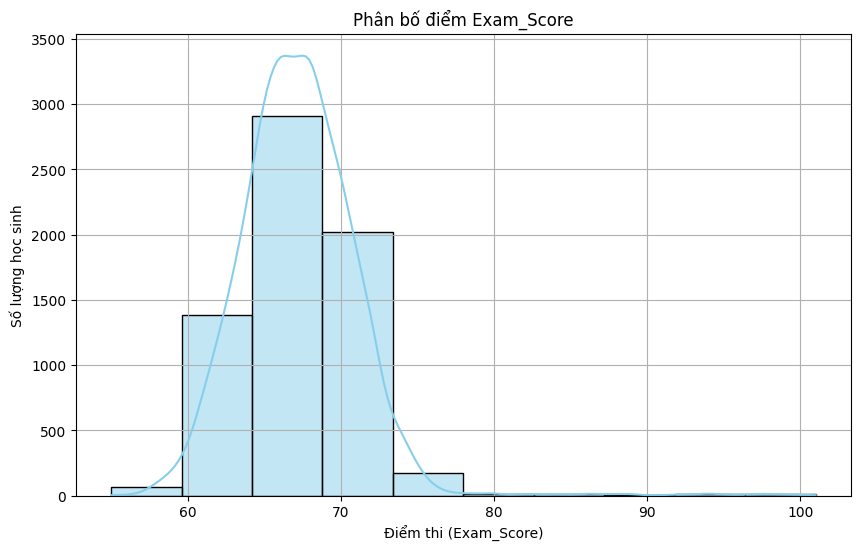

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV (bạn cần thay đường dẫn đúng vào đây)
df = pd.read_csv("StudentPerformanceFactors.csv")

# Kiểm tra phân bố điểm
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=10, kde=True, color='skyblue')
plt.title('Phân bố điểm Exam_Score')
plt.xlabel('Điểm thi (Exam_Score)')
plt.ylabel('Số lượng học sinh')
plt.grid(True)
plt.show()


In [4]:
import pandas as pd


# Đếm số lượng từng đầu điểm
score_counts = df['Exam_Score'].value_counts().sort_index()

# In kết quả
print("Số lượng học sinh theo từng đầu điểm:")
print(score_counts)


Số lượng học sinh theo từng đầu điểm:
Exam_Score
55       1
56       1
57       4
58      22
59      40
60      77
61     171
62     264
63     371
64     501
65     679
66     751
67     717
68     759
69     624
70     542
71     408
72     304
73     141
74     106
75      48
76      16
77       5
78       4
79       3
80       5
82       4
83       1
84       3
85       1
86       4
87       2
88       3
89       3
91       1
92       2
93       2
94       4
95       2
96       1
97       3
98       3
99       2
100      1
101      1
Name: count, dtype: int64


In [8]:
# Import lại sau khi reset môi trường
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Đọc lại dữ liệu
df = pd.read_csv("StudentPerformanceFactors.csv")

# 1. Xóa khoảng trắng đầu/cuối ô
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 2. Xoá các dòng có giá trị thiếu
df.dropna(inplace=True)

# 3. Mã hoá các cột phân loại (Label Encoding)
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 4. Chuyển cột mục tiêu Exam_Score thành nhãn nhị phân (trên/dưới trung bình)
threshold = df["Exam_Score"].median()
df['Exam_Score_Binary'] = df['Exam_Score'].apply(lambda x: 1 if x >= 60 else 0)

# 5. Tách features và target
X = df.drop(columns=["Exam_Score", "Exam_Score_Binary"])
y = df["Exam_Score_Binary"]

# 6. Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Train mô hình Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 9. Dự đoán và đánh giá
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

df.head(), report_df


C:\Users\Admin\AppData\Local\Temp\ipykernel_14192\2715578953.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


(   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
 0             23          84                     1                    0   
 1             19          64                     1                    2   
 2             24          98                     2                    2   
 3             29          89                     1                    2   
 4             19          92                     2                    2   
 
    Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
 0                           0            7               73                 1   
 1                           0            8               59                 1   
 2                           1            7               91                 2   
 3                           1            8               98                 2   
 4                           1            6               65                 2   
 
    Internet_Access  Tutoring_Sessions  ...  Tea